In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Pour des visualisations plus esthétiques

In [116]:
# Charger les données (remplacer 'votre_fichier.csv' par le chemin de votre fichier)
data = pd.read_csv('./data/data_delinquance.csv', sep=';')
# Afficher les 5 premières lignes pour un aperçu
print(data.head())

      classe  annee Code.département  Code.région unité.de.compte  millPOP  \
0  Homicides     16               01           84         victime       16   
1  Homicides     16               02           32         victime       16   
2  Homicides     16               03           84         victime       16   
3  Homicides     16               04           93         victime       16   
4  Homicides     16               05           93         victime       16   

   millLOG  faits     POP                LOG         tauxpourmille  
0       16      5  638425  308491,1600513844  7,83177350511023e-03  
1       16     10  536136  264180,0836046834  1,86519838249996e-02  
2       16      4  339384  206980,3726684623  1,17860594488839e-02  
3       16      2  162565  126760,4042559317  1,23027711992126e-02  
4       16      0  141107  134646,6209596995  0,00000000000000e+00  


In [117]:
# Informations sur les données
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12928 entries, 0 to 12927
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   classe            12928 non-null  object
 1   annee             12928 non-null  int64 
 2   Code.département  12928 non-null  object
 3   Code.région       12928 non-null  int64 
 4   unité.de.compte   12928 non-null  object
 5   millPOP           12928 non-null  int64 
 6   millLOG           12928 non-null  int64 
 7   faits             12928 non-null  int64 
 8   POP               12928 non-null  int64 
 9   LOG               12928 non-null  object
 10  tauxpourmille     12928 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.1+ MB
None


In [118]:
print(data.describe())

              annee   Code.région       millPOP       millLOG          faits  \
count  12928.000000  12928.000000  12928.000000  12928.000000   12928.000000   
mean      19.500000     52.653465     19.103960     19.103960    1980.332225   
std        2.291376     28.196461      1.835931      1.835931    4497.277245   
min       16.000000      1.000000     16.000000     16.000000       0.000000   
25%       17.750000     27.000000     17.000000     17.000000     264.000000   
50%       19.500000     52.000000     19.000000     19.000000     825.000000   
75%       21.250000     76.000000     21.000000     21.000000    2083.250000   
max       23.000000     94.000000     21.000000     21.000000  161745.000000   

                POP  
count  1.292800e+04  
mean   6.658978e+05  
std    5.100051e+05  
min    7.642200e+04  
25%    2.829485e+05  
50%    5.303595e+05  
75%    8.414820e+05  
max    2.611293e+06  


In [119]:
# Vérification des valeurs manquantes
print(data.isnull().sum())
print(data['tauxpourmille'])

classe              0
annee               0
Code.département    0
Code.région         0
unité.de.compte     0
millPOP             0
millLOG             0
faits               0
POP                 0
LOG                 0
tauxpourmille       0
dtype: int64
0        7,83177350511023e-03
1        1,86519838249996e-02
2        1,17860594488839e-02
3        1,23027711992126e-02
4        0,00000000000000e+00
                 ...         
12923    4,99590179930526e+00
12924    3,32364053677210e+00
12925    2,45623094153193e+00
12926    2,77102749561790e+00
12927    8,81029791281703e-01
Name: tauxpourmille, Length: 12928, dtype: object


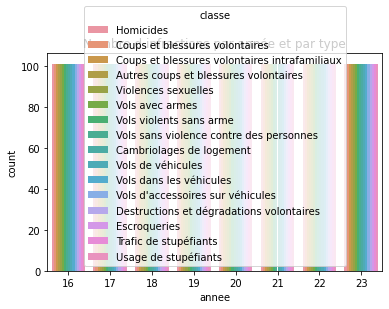

In [120]:
# Visualisation du nombre d'infractions par année et par type
sns.countplot(x='annee', hue='classe', data=data)
plt.title('Nombre d infractions par année et par type')
plt.show()

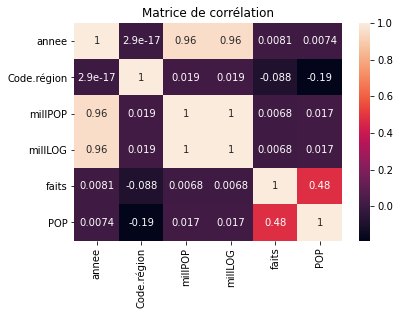

In [121]:
# Carte de chaleur de la matrice de corrélation
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matrice de corrélation')
plt.show()

In [122]:
#je recupere les noms correspondants aux codes des regions
regions = pd.read_csv('./data/code_region_2024.csv', sep=',')
print(regions.head())
print(regions.info())

   REG CHEFLIEU  TNCC         NCC      NCCENR     LIBELLE
0    1    97105     3  GUADELOUPE  Guadeloupe  Guadeloupe
1    2    97209     3  MARTINIQUE  Martinique  Martinique
2    3    97302     3      GUYANE      Guyane      Guyane
3    4    97411     0  LA REUNION  La Réunion  La Réunion
4    6    97611     0     MAYOTTE     Mayotte     Mayotte
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   REG       18 non-null     int64 
 1   CHEFLIEU  18 non-null     object
 2   TNCC      18 non-null     int64 
 3   NCC       18 non-null     object
 4   NCCENR    18 non-null     object
 5   LIBELLE   18 non-null     object
dtypes: int64(2), object(4)
memory usage: 992.0+ bytes
None


In [123]:
# Créer un dictionnaire à partir des données des régions
regions_dict = dict(zip(regions['REG'], regions['LIBELLE']))

# Ajouter la colonne "LIBELLE" au DataFrame data en utilisant le dictionnaire
data['LIBELLE'] = data['Code.région'].map(regions_dict)

# Afficher les premières lignes du DataFrame modifié
print(data.head())

      classe  annee Code.département  Code.région unité.de.compte  millPOP  \
0  Homicides     16               01           84         victime       16   
1  Homicides     16               02           32         victime       16   
2  Homicides     16               03           84         victime       16   
3  Homicides     16               04           93         victime       16   
4  Homicides     16               05           93         victime       16   

   millLOG  faits     POP                LOG         tauxpourmille  \
0       16      5  638425  308491,1600513844  7,83177350511023e-03   
1       16     10  536136  264180,0836046834  1,86519838249996e-02   
2       16      4  339384  206980,3726684623  1,17860594488839e-02   
3       16      2  162565  126760,4042559317  1,23027711992126e-02   
4       16      0  141107  134646,6209596995  0,00000000000000e+00   

                      LIBELLE  
0        Auvergne-Rhône-Alpes  
1             Hauts-de-France  
2        Auver

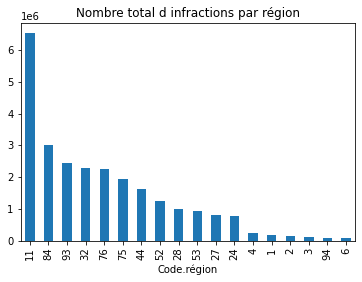

In [124]:
# Regroupement par code région par ordre décroissant
data.groupby('Code.région')['faits'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Nombre total d infractions par région')
plt.show()

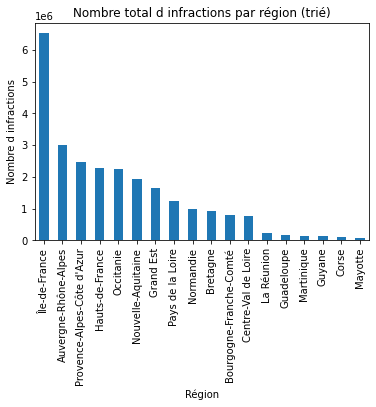

In [125]:
# Regroupement par région et tri par ordre décroissant
data_grouped = data.groupby('LIBELLE')['faits'].sum().sort_values(ascending=False)

# Création du graphique
data_grouped.plot(kind='bar')
plt.title('Nombre total d infractions par région (trié)')
plt.xlabel('Région')
plt.ylabel('Nombre d infractions')
plt.show()


object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12928 entries, 0 to 12927
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   classe            12928 non-null  object
 1   annee             12928 non-null  int64 
 2   Code.département  12928 non-null  object
 3   Code.région       12928 non-null  int64 
 4   unité.de.compte   12928 non-null  object
 5   millPOP           12928 non-null  int64 
 6   millLOG           12928 non-null  int64 
 7   faits             12928 non-null  int64 
 8   POP               12928 non-null  int64 
 9   LOG               12928 non-null  object
 10  tauxpourmille     12928 non-null  object
 11  LIBELLE           12928 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.2+ MB


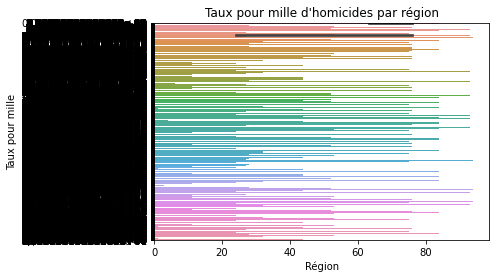

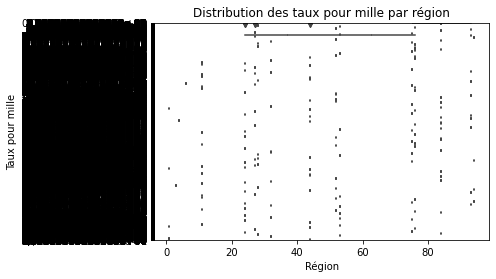

In [128]:
# Convertir le taux pour mille en numérique (si nécessaire)
print(data['tauxpourmille'].dtype)
data['tauxpourmille'] = data['tauxpourmille'].astype(str)
#data['tauxpourmille'] = data['tauxpourmille'].str.replace(',', '.')  # Remplacer les virgules par des points
#data['tauxpourmille'] = pd.to_numeric(data['tauxpourmille'])
#data['tauxpourmille'] = pd.to_numeric(data['tauxpourmille'], errors='coerce')
data.info()
#print(data['tauxpourmille'])

# Créer une carte choroplèthe (si vous avez des données géographiques)
# ... (code pour créer la carte, en utilisant des bibliothèques comme geopandas)

# Diagramme en barres
sns.barplot(x='Code.région', y='tauxpourmille', data=data)
plt.title("Taux pour mille d'homicides par région")
plt.xlabel("Région")
plt.ylabel("Taux pour mille")

plt.show()

# Boxplot
sns.boxplot(x='Code.région', y='tauxpourmille', data=data)
plt.title("Distribution des taux pour mille par région")
plt.xlabel("Région")
plt.ylabel("Taux pour mille")
plt.show()